# Stock Price Prediction using Machine Learning in Python

# OBJECTIVE


The objective is to build a machine learning model that can predict future Tesla stock prices based on historical data. It's important to remember that stock prices are influenced by various factors, and this model is for educational purposes only, not guaranteed financial advice.

# DATA SOURCE

The data source is the "Tesla Stock Price From 2010 To 2020" dataset available on Kaggle: https://www.kaggle.com/datasets/timoboz/tesla-stock-data-from-2010-to-2020

# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# Import Data

In [2]:
data = pd.read_csv('Tesla_stock_data.csv')

# Describe Data

In [3]:
print(data.head())
print(data.describe())
print(data.info())

         Date       Open   High        Low      Close  Adj Close    Volume
0  2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900
              Open         High          Low        Close    Adj Close  \
count  2416.000000  2416.000000  2416.000000  2416.000000  2416.000000   
mean    186.271147   189.578224   182.916639   186.403651   186.403651   
std     118.740163   120.892329   116.857591   119.136020   119.136020   
min      16.139999    16.629999    14.980000    15.800000    15.800000   
25%      34.342498    34.897501    33.587501    34.400002    34.400002   
50%     213.035004   216.745002   208.870002   212.960007   212.960007   
75%     266.450012   270.927513 

# Data Visualization

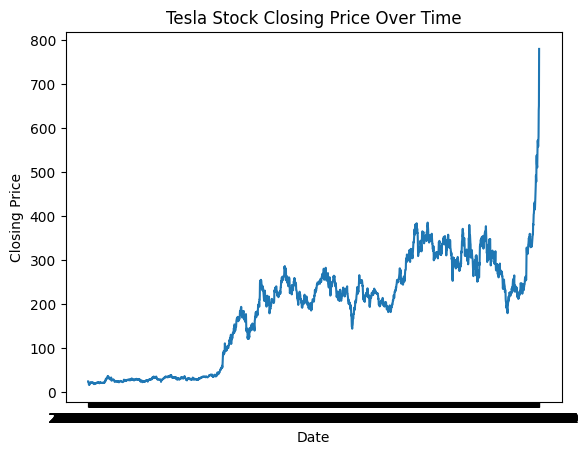

In [4]:
plt.plot(data['Date'], data['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Tesla Stock Closing Price Over Time')
plt.show()

# Data Preprocessing

In [4]:
import pandas as pd
data = pd.read_csv('Tesla_stock_data.csv')
if data['Close'].isnull().sum() > 0:
    data['Close'].fillna(data['Close'].mean(), inplace=True)
if not pd.api.types.is_datetime64_dtype(data['Date']):
    data['Date'] = pd.to_datetime(data['Date'])

# Define Target Variable (y) and Feature Variables (X)

In [5]:
y = data['Close']  # Or 'Adj Close'
X = data.drop(['Date', y.name], axis=1)

# Train Test Split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Modeling

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Model Evaluation

In [13]:
from sklearn.metrics import r2_score

predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)

print("R-squared:", r2)

R-squared: 1.0


# Prediction

ValueError: x and y must be the same size

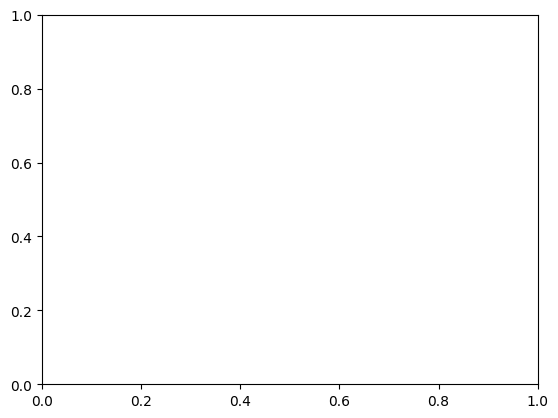

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color='gray', label='Actual data')
plt.plot(X_test, predictions, color='red', linewidth=2, label='Predictions')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Explaination

Linear Regression models are inherently interpretable because they directly relate features (independent variables) to the target variable (dependent variable) through coefficients. By analyzing these coefficients:

Positive coefficients: Indicate that a higher value in that feature is associated with a higher predicted closing price.
Negative coefficients: Suggest that a higher value in that feature leads to a lower predicted closing price.
Coefficient magnitude: Reflects the relative importance of each feature in influencing the predicted closing price.

For models like Random Forests or Neural Networks, understanding feature importance and individual predictions becomes less straightforward. Here are some techniques you can explore:

Feature Importance: Some models (like Random Forests) provide built-in measures of feature importance. These measures can help you understand which features contribute most to the model's predictions overall.
LIME (Local Interpretable Model-Agnostic Explanations): This technique allows you to explain individual predictions by approximating the model locally around a specific data point. It provides insights into how feature values in that particular instance contribute to the prediction.
SHAP (SHapley Additive exPlanations): SHAP assigns credit for a prediction to each feature, offering a more comprehensive explanation for complex models.